# Customer Analysis Case

## **Libraries:**

In [30]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PowerTransformer

## Content notes:

### Files relative paths:

In [14]:
file1 = "file1.csv"
file2 = "file2.csv"
file3 = "Data_Marketing_Customer_Analysis_Round2.csv"

## **Functions:**

### Get data:

In [15]:
#### read a file:
def get_data_set(file1):             
    return pd.read_csv(file1)

#### combine with dataframe from file2:
def concat_data_set2(data): 
    df2 = pd.read_csv("file2.csv")
    return pd.concat([data,df2])

    

#### merging (outer join) with file3
def merge_for_time_values(data):
    df3 = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")
    df3.rename(
        columns={
        "Customer":"customer",
        "Response":"response",
        "Coverage":"coverage",
        "Effective To Date":"effective_to_date",
        "EmploymentStatus":"employment_status",
        "Number of Policies":"number_of_policies",
        "Policy":"policy",
        "Renew Offer Type":"renew_offer_type",
        "Sales Channel":"sales_channel",
        "Vehicle Size":"vehicle_size",
        "State": "state",
        "Customer Lifetime Value": "customer_lifetime_value",
        "Education": "education",
        "Gender": "gender",
        "Income": "income",
        "Location Code": "location_code",
        "Marital Status": "marital_status",
        "Monthly Premium Auto": "monthly_premium_auto",
        "Months Since Last Claim": "months_since_last_claim",
        "Months Since Policy Inception": "months_since_last_policy_inception",
        "Number of Open Complaints": "number_of_open_complaints",
        "Policy Type": "policy_type",
        "Total Claim Amount": "total_claim_amount",
        "Vehicle Class": "vehicule_class",
        "Vehicle Type": "vehicule_type"
        }, inplace=True
    )
    data = pd.merge(data,df3, on=(
        ["customer",
        "state",
        "gender",
        "education",
        "customer_lifetime_value",
        "income",
        "monthly_premium_auto",
        "number_of_open_complaints",
        "policy_type",
        "vehicule_class",
        "total_claim_amount",
        ]
    ),
                    how="outer", indicator=True)
    return data

### Data cleaning:

In [126]:
### removing duplicates:
def remove_duplicates(data):
    return data.drop_duplicates()

### renaming columns
def rename_columns(data):
    return data.rename(
        columns={"Customer":"customer",
        "ST":"state",
        "GENDER":"gender",
        "Education":"education",
        "Customer Lifetime Value":"customer_lifetime_value",
        "Monthly Premium Auto":"monthly_premium_auto",
        "Income":"income",
        "Number of Open Complaints":"number_of_open_complaints",
        "Policy Type":"policy_type",
        "Vehicle Class":"vehicule_class",
        "Total Claim Amount":"total_claim_amount"
                }
    )


### cleaning up state names
def clean_up_states(data):
    dict = {
        "Oregon": "OR",
        "California": "CA",
        "Arizona": "AZ",
        "Nevada": "NV",
        "Washington": "WA",
        "Cali": "CA"
        }
    return data.replace({"state": dict})


### droping all rows which have only Nan values
def drop_full_nan(data):
    return data.dropna(axis=0, how="all")

### stardardizing gender column
def standardize_gender_values(data):
    dict = {
        "Male": "M",
        "female": "F",
        "Femal": "F",
        }
    return data.replace({"gender": dict})


### stardardizing education column
def standardize_education_values(data):
    dict = {
        "Bachelors": "Bachelor",
        }
    return data.replace({"education": dict})


### removing % character from the customer_lifetime_value_column
def remove_percent(data):
    data["customer_lifetime_value"] = data["customer_lifetime_value"].str.replace("%","")
    return data

### setting the customer_lifetime_value column to numeric type
def set_cslifetimevalue_to_numeric(data):
    data["customer_lifetime_value"] = pd.to_numeric(data["customer_lifetime_value"], errors = "coerce")
    return data

### replacing the number_of_open_complaints columns with a new column with the correct values
def number_of_open_complaints_cleanup(data):
    data["number_of_open_complaints"] = data["number_of_open_complaints"].str[2]
    return data


### setting the number_of_open_complaints column to numeric type
def set_nbofopencomplaints_to_numeric(data):
    data["number_of_open_complaints"] = pd.to_numeric(data["number_of_open_complaints"], errors = "coerce")
    return data


### rounding-up total_claim_amount_column
def roundup_total_claim_amount(data):
    data["total_claim_amount"] = round(data["total_claim_amount"])
    return data

### replacing NaN values of gender column with "missing" and by the mean for customer_lifetime_value
def replace_nan_values(data):
    data["gender"] = data["gender"].fillna("missing")
    data["customer_lifetime_value"] = data["customer_lifetime_value"].fillna(data["customer_lifetime_value"].mean()).round(decimals=2)
    return data


### bucketing states per region
def states_buckets(data):
    dict = {
        "CA": "West Region",
        "OR": "North West",
        "WA": "East",
        "AZ": "Central",
        "NV":  "Central",
        }
    data.insert(2,"region",data["state"])
    data.replace({"region": dict}, inplace=True)
    return data


### setting effective_to_date column to datetime type
def set_time_column_to_datetime(data):
    data["effective_to_date"] = pd.to_datetime(data["effective_to_date"])
    return data


### extracting month from the effective_tot_date column into a new column names "month"
def extract_month(data):
    data.insert(16, "month", pd.DatetimeIndex(data['effective_to_date']).month)
    return data


### Drop the rows where at least one element is missing in state column
def drop_rows_with_nan_in_state(data):
    data.dropna(subset=["state"], inplace=True)
    return data

### Drop the rows where at least one element is missing in number_of_open_complaints
def drop_rows_with_nan_in_open_complaints(data):
    data.dropna(subset=["number_of_open_complaints"], inplace=True)
    return data


### rounding-up total_claim_amount_column
def roundup_customer_lifetime_value(data):
    data["customer_lifetime_value"] = round(data["customer_lifetime_value"])
    return data

### dropping columns customer, unnamed, months_since_last_claim, vehicle_size, vehicule_type 
def drop_some_columns(data):
    data.drop(columns=["customer", "Unnamed: 0", "months_since_last_claim", "vehicle_size", "vehicule_type"], inplace=True)
    return data

## **Pipeline controller:**

In [127]:
data = (
    get_data_set(file1)                     #### getting data from file1
.pipe(concat_data_set2)                     #### appending data from dataset2
.pipe(remove_duplicates)                    #### removing duplicates
.pipe(rename_columns)                       #### renaming columns
.pipe(clean_up_states)                      #### normalizing state names
.pipe(drop_full_nan)                        #### droping all columns which have only NaN values
.pipe(standardize_gender_values)            #### standardizing gender column values
.pipe(standardize_education_values)         #### standardizing education column values
.pipe(remove_percent)                       #### removing the % from the customer_lifetime_value column
.pipe(set_cslifetimevalue_to_numeric)       #### setting customer_lifatime_value column to numeric
.pipe(number_of_open_complaints_cleanup)    #### cleaning-up number_of_open_complaints column
.pipe(set_nbofopencomplaints_to_numeric)    #### setting number_of_open_complaints column to numeric
.pipe(roundup_total_claim_amount)           #### rounding-up values in the total_claim_amount column
.pipe(replace_nan_values)                   #### replacing NaN values
.pipe(merge_for_time_values)                #### outer join to merge with new data set (file3) with time values
.pipe(remove_duplicates)                    #### removing duplicates after merge
.pipe(set_time_column_to_datetime)          #### setting column effective_to_date to datetime
.pipe(extract_month)                        #### extracting month from the effective_to_date column into a new column names "month"
.pipe(drop_full_nan)                        #### droping all columns which have only NaN values
.pipe(drop_rows_with_nan_in_state)          #### drop rows for which there is a NaN value in state column
.pipe(states_buckets)                       #### buceking states per region
.pipe(roundup_total_claim_amount)           #### rounding-up values in the total_claim_amount column
.pipe(roundup_customer_lifetime_value)      #### rounding-up values in the customer_lifetime_value column
.pipe(drop_some_columns)                    #### dropping columns customer, unnamed, months_since_last_claim, vehicle_size, vehicule_type

)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12343 entries, 0 to 12972
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   state                               12343 non-null  object        
 1   region                              12343 non-null  object        
 2   gender                              12343 non-null  object        
 3   education                           12343 non-null  object        
 4   customer_lifetime_value             12343 non-null  float64       
 5   income                              12343 non-null  float64       
 6   monthly_premium_auto                12343 non-null  float64       
 7   number_of_open_complaints           11752 non-null  float64       
 8   policy_type                         12343 non-null  object        
 9   vehicule_class                      11752 non-null  object        
 10  total_claim_amount    

In [175]:
numericals = data.select_dtypes("float64")
categoricals = data.select_dtypes("object")
numericals

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount,month,months_since_last_policy_inception,number_of_policies
0,780264.0,0.0,1000.0,0.0,3.0,NaN,NaN,NaN
1,697954.0,0.0,94.0,0.0,1131.0,NaN,NaN,NaN
2,1288743.0,48767.0,108.0,0.0,566.0,NaN,NaN,NaN
3,764586.0,0.0,106.0,0.0,530.0,NaN,NaN,NaN
4,536308.0,36357.0,68.0,0.0,17.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12968,19228.0,0.0,187.0,0.0,898.0,2.0,32.0,2.0
12969,15563.0,0.0,253.0,NaN,1214.0,1.0,40.0,7.0
12970,5259.0,61146.0,65.0,0.0,273.0,1.0,68.0,6.0
12971,23893.0,39837.0,201.0,0.0,381.0,2.0,63.0,2.0


## **Correlations**

In [136]:
matrix = numericals.corr()

In [137]:
matrix

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount,month,months_since_last_policy_inception,number_of_policies
customer_lifetime_value,1.000000,0.036588,0.042697,-0.004533,0.023306,-0.010283,0.010915,0.016925
income,0.036588,1.000000,0.019148,0.006739,-0.351164,-0.003175,-0.001657,-0.011334
monthly_premium_auto,0.042697,0.019148,1.000000,0.004384,0.023057,0.008354,0.018108,-0.018379
number_of_open_complaints,-0.004533,0.006739,0.004384,1.000000,-0.010211,-0.007973,0.001807,0.001548
total_claim_amount,0.023306,-0.351164,0.023057,-0.010211,1.000000,0.002201,0.002417,-0.009140
month,-0.010283,-0.003175,0.008354,-0.007973,0.002201,1.000000,0.015353,0.006670
months_since_last_policy_inception,0.010915,-0.001657,0.018108,0.001807,0.002417,0.015353,1.000000,-0.012195
number_of_policies,0.016925,-0.011334,-0.018379,0.001548,-0.009140,0.006670,-0.012195,1.000000


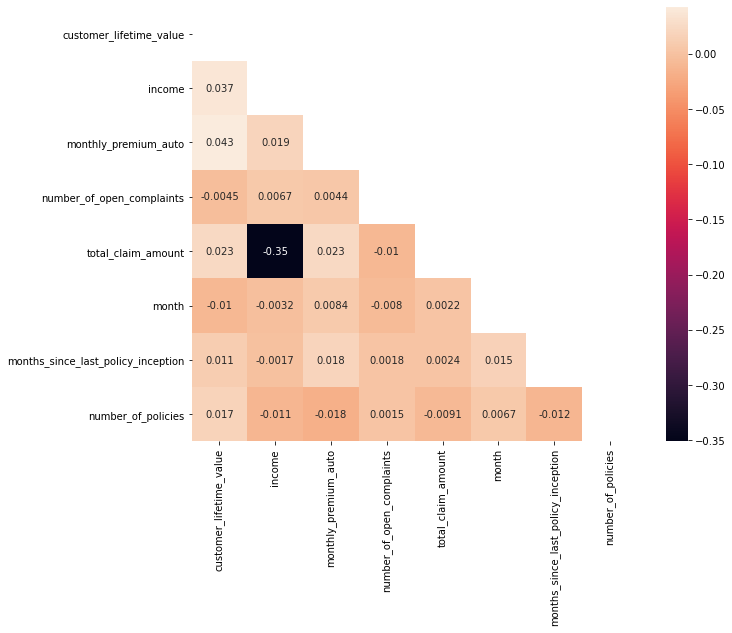

In [171]:
mask=np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(matrix, mask=mask, annot=True)

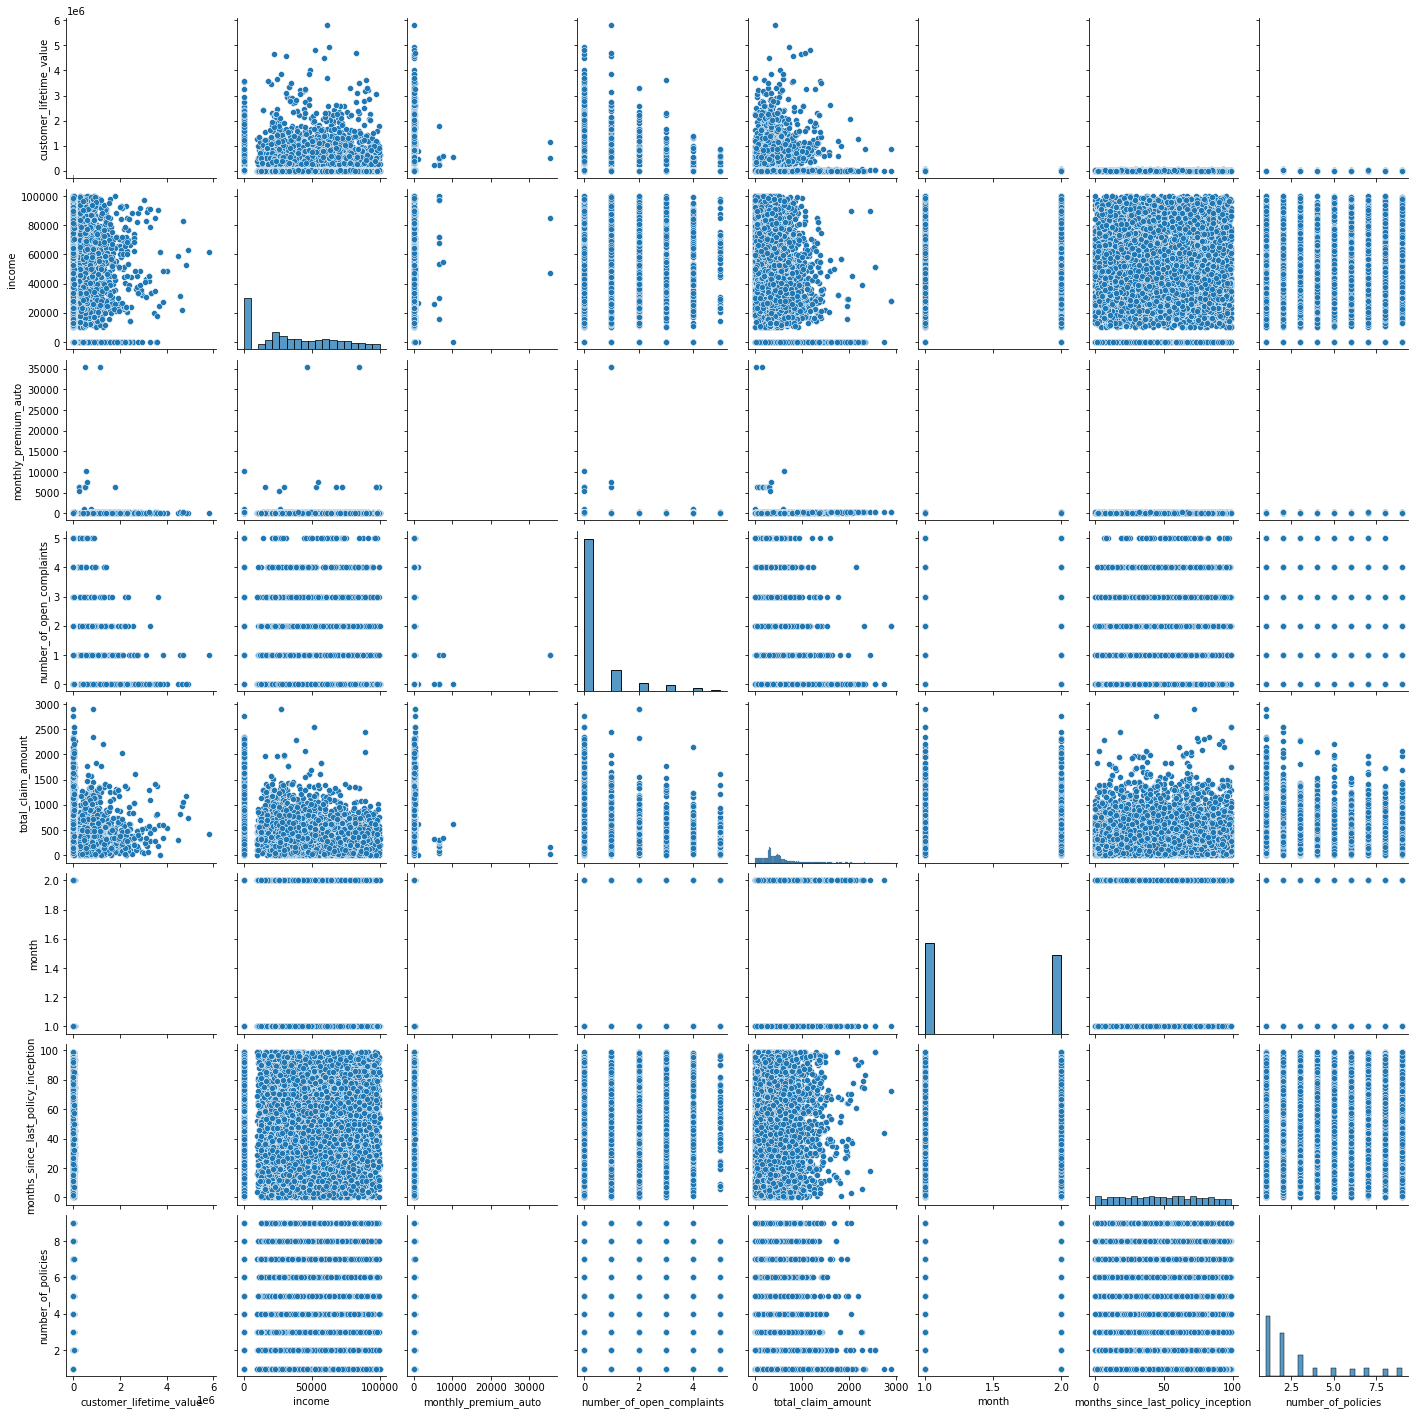

In [138]:
sns.pairplot(numericals)
plt.show()

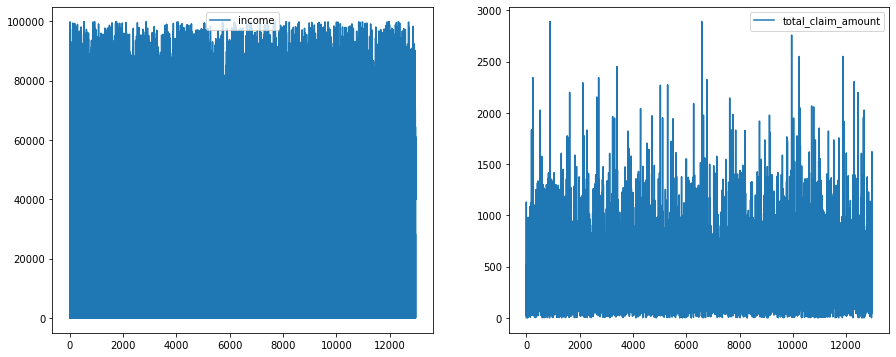

In [235]:
fig2, ax2 = plt.subplots(1,2, figsize=(15,6))

for x in range(len(numericals[["income","total_claim_amount"]].columns)):
    ax2[x].plot(
        numericals[["income","total_claim_amount"]].iloc[:,x], 
        label=numericals[["income","total_claim_amount"]].columns[x],
    )
    ax2[x].legend()



<AxesSubplot:>

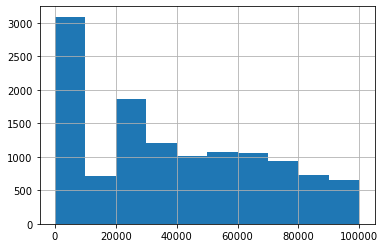

In [252]:
numericals["income"].dropna().hist()


In [254]:
pt = PowerTransformer()
income_normalized = pt.fit_transform(numericals["income"].to_numpy().reshape(-1,1))

/Users/andres/opt/anaconda3/envs/DAIH_Env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

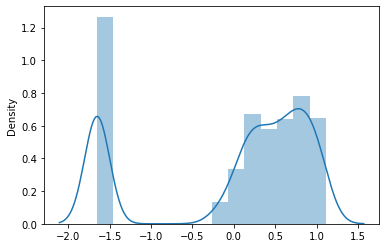

In [256]:
sns.distplot(income_normalized, hist=True)

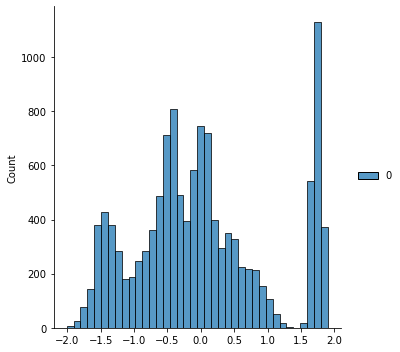

In [34]:
sns.displot(customer_lifetime_value_normalized)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12343 entries, 0 to 12972
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   customer                            12343 non-null  object        
 1   state                               12343 non-null  object        
 2   region                              12343 non-null  object        
 3   gender                              12343 non-null  object        
 4   education                           12343 non-null  object        
 5   customer_lifetime_value             12343 non-null  float64       
 6   income                              12343 non-null  float64       
 7   monthly_premium_auto                12343 non-null  float64       
 8   number_of_open_complaints           11752 non-null  float64       
 9   policy_type                         12343 non-null  object        
 10  vehicule_class        

In [192]:
data.vehicle_size.value_counts()

Medsize    6815
Small      1861
Large      1012
Name: vehicle_size, dtype: int64